#### 线性多分类

+ 随机生成3个类别的二维高斯分布样本
+ 类别编号为：0，1，2

y: [1 2 0 2 0 0 1 1 1 0 2 1 0 2 1 0 1 1 0 0 2 0 1 1 1 1 0 1 2 0 1 2 1 0 1 2 2
 1 2 2 1 0 0 2 1 2 2 0 0 0 2 1 2 2 0 2 0 0 2 0 1 0 1 1 0 1 2 2 1 1 2 1 0 1
 2 0 2 2 0 0 1 2 0 0 0 2 2 2 0 1 0 2 2 0 1 2 1 0 2 1]


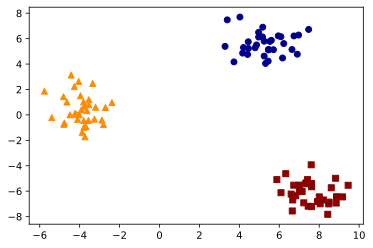

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X,y = make_blobs(centers=3, random_state=26,n_samples=100)

print("y:", y)

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'s',color="darkred")

plt.show()

**One vs. Rest 方式**

+ 在LogisticRegression函数中引入参数：<font color=yellow>multi_class='ovr'</font>
+ 获取3个线性分类器的参数
+ 画出3个判别边界
+ 画出3个类别的判别区域

w:
 [[-1.22868189 -0.19464336]
 [ 0.68494304  1.19616244]
 [ 0.61140392 -0.96942375]]
b: [ 1.07530675 -4.4777967  -4.38128814]


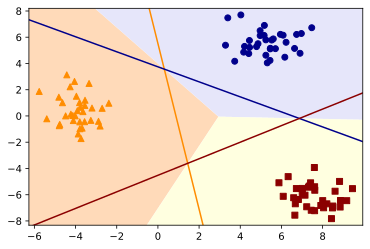

In [9]:
from sklearn.linear_model import LogisticRegression
from plot_decision_boundary import plot_decision_boundary

CLF = LogisticRegression(multi_class='ovr').fit(X, y)
predict_y = CLF.predict(X)

print("w:\n", CLF.coef_)
print("b:", CLF.intercept_)

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'s',color="darkred")

eps = 0.5
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

xx = np.linspace(x_min, x_max, 1000)

yy = -1*(CLF.coef_[0][0]*xx + CLF.intercept_[0]) / CLF.coef_[0][1]
plt.plot(xx,yy,'darkorange')

yy = -1*(CLF.coef_[1][0]*xx + CLF.intercept_[1]) / CLF.coef_[1][1]
plt.plot(xx,yy,'darkblue')

yy = -1*(CLF.coef_[2][0]*xx + CLF.intercept_[2]) / CLF.coef_[2][1]
plt.plot(xx,yy,'darkred')
plt.ylim((y_min,y_max))

plot_decision_boundary(CLF,axis=[x_min,x_max,y_min,y_max])

plt.show()

**生成另外一组数据**

y: [1 2 2 1 0 0 2 2 0 2 2 2 1 0 2 0 2 2 2 1 2 2 0 0 2 0 2 2 2 2 2 2 0 0 0 1 1
 1 1 0 0 1 1 0 0 2 2 1 1 1 1 0 2 1 0 1 0 0 0 1 0 1 0 0 1 2 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 2 2 1 0 1 2 1 2 1 2 2 2 2 1 1 1 0 2 0 0]


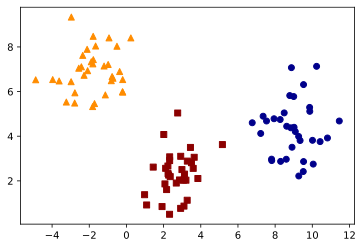

In [10]:
X,y = make_blobs(centers=3, random_state=38,n_samples=100)

print("y:", y)

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'s',color="darkred")

plt.show()

**One vs. Rest 方式分类**

[[-1.24141032  1.14030036]
 [ 1.62513908  0.40557217]
 [-0.57991494 -2.28942026]]
[ -4.53806921 -10.84898476  10.24443145]


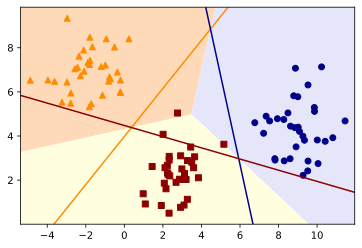

In [11]:
CLF = LogisticRegression(multi_class='ovr').fit(X, y)
predict_y = CLF.predict(X)

print(CLF.coef_)
print(CLF.intercept_)

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'s',color="darkred")

eps = 0.5
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

xx = np.linspace(x_min, x_max, 1000)

yy = -1*(CLF.coef_[0][0]*xx + CLF.intercept_[0]) / CLF.coef_[0][1]
plt.plot(xx,yy,'darkorange')

yy = -1*(CLF.coef_[1][0]*xx + CLF.intercept_[1]) / CLF.coef_[1][1]
plt.plot(xx,yy,'darkblue')

yy = -1*(CLF.coef_[2][0]*xx + CLF.intercept_[2]) / CLF.coef_[2][1]
plt.plot(xx,yy,'darkred')
plt.ylim((y_min,y_max))

plot_decision_boundary(CLF,axis=[x_min,x_max,y_min,y_max])

plt.show()

**One vs. One 方式**

+ 使用函数OneVsOneClassifier实现多类别分类
+ 输入参数：<font color=yellow> LogisticRegression </font>，指定二分类学习模型
+ 获取3个线性分类函数的参数
+ 画出分类边界和分类区域

w and b:
[[ 1.0887506  -0.27997323]] [-2.36131102]
[[ 1.23309652 -1.14458655]] [4.56172557]
[[-1.62002574 -0.41305829]] [10.84242497]


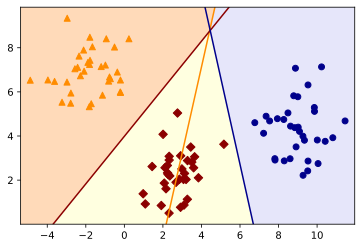

In [12]:
from sklearn.multiclass import OneVsOneClassifier

CLF = OneVsOneClassifier(LogisticRegression()).fit(X,y)
clf0 = CLF.estimators_[0]
clf1 = CLF.estimators_[1]
clf2 = CLF.estimators_[2]

print( "w and b:")
print(clf0.coef_,clf0.intercept_)
print(clf1.coef_,clf1.intercept_)
print(clf2.coef_,clf2.intercept_)

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'D',color="darkred")

eps = 0.5
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

xx = np.linspace(x_min, x_max, 1000)
yy = -1*(clf0.coef_[0][0]*xx + clf0.intercept_) / clf0.coef_[0][1]
plt.plot(xx,yy,'darkorange')

yy = -1*(clf1.coef_[0][0]*xx + clf1.intercept_) / clf1.coef_[0][1]
plt.plot(xx,yy,'darkred')

yy = -1*(clf2.coef_[0][0]*xx + clf2.intercept_) / clf2.coef_[0][1]
plt.plot(xx,yy,'darkblue')
plt.ylim((y_min,y_max))

plot_decision_boundary(CLF,axis=[x_min,x_max,y_min,y_max])

plt.show()

**Softmax方式**

+ 在函数LogisticRegression中引入参数：<font color=yellow>multi_class='multinomial'</font>
+ 获取3个线性函数的参数
+ 计算和显示3个类别后验概率(对数)
+ 画出3个类别的判别区域

w:
 [[-1.20411311  0.72769566]
 [ 1.41035104  0.10440383]
 [-0.20623793 -0.83209949]]
b:
 [-0.29124979 -6.20635117  6.49760096]

   Posteriors                           Label:
 [[-8.16941513  7.04738254  1.12203258  1.        ]
 [-2.45568131 -0.97838571  3.43406702  2.        ]
 [-0.97391235 -2.62340029  3.59731264  2.        ]
 [-9.9872922   7.46413215  2.52316005  1.        ]
 [ 7.37460606 -9.49762599  2.12301993  0.        ]
 [ 7.34909209 -8.71756069  1.3684686   0.        ]
 [-1.53379348 -2.65507483  4.18886831  2.        ]
 [-0.46197283 -4.68466851  5.14664134  2.        ]
 [ 6.16700709 -6.08773191 -0.07927517  0.        ]
 [-1.29468811 -2.80500788  4.099696    2.        ]]


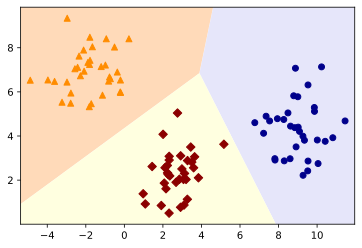

In [13]:
CLF = LogisticRegression(multi_class='multinomial').fit(X,y)

print("w:\n", CLF.coef_)
print("b:\n",CLF.intercept_)

py0= np.matmul(X,CLF.coef_[0].reshape(-1,1)) + CLF.intercept_[0]
py1= np.matmul(X,CLF.coef_[1].reshape(-1,1)) + CLF.intercept_[1]
py2= np.matmul(X,CLF.coef_[2].reshape(-1,1)) + CLF.intercept_[2]

py = np.append(py0,py1,axis=1)
py = np.append(py,py2,axis=1)
py = np.append(py,y.reshape(-1,1),axis=1)
print("\n   Posteriors                           Label:\n", py[0:10,:])

id0 = np.where(y==0)
id1 = np.where(y==1)
id2 = np.where(y==2)

plt.plot(X[id0,0],X[id0,1],'^',color='darkorange')
plt.plot(X[id1,0],X[id1,1],'o',color="darkblue")
plt.plot(X[id2,0],X[id2,1],'D',color="darkred")

eps = 0.5
x_min,x_max=X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max=X[:,1].min()-eps, X[:, 1].max()+eps

plot_decision_boundary(CLF,axis=[x_min,x_max,y_min,y_max])

plt.show()